In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import numpy as np
from sklearn.linear_model import LinearRegression
import requests
import folium
from IPython.display import display
from api_keys import geoapify_key

# Study data files
teds_file_path = "tedsa_puf_2019.csv"
nssats_data ="NSSATS_PUF_2019_CSV.csv"


teds_file_df = pd.read_csv(teds_file_path)
nssats_data_df = pd.read_csv(nssats_data)

teds_file_df.head()


C:\Users\jimco\AppData\Local\Temp\ipykernel_139156\977418796.py:18: DtypeWarning: Columns (9,10,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,75,76,77,78,84,86,87,136,148,149,150,151,152,153,155,181,184,191,197,200,206,207,209,210,212,213,215,216,218,221,228,230,231,233,238) have mixed types. Specify dtype option on import or set low_memory=False.
  nssats_data_df = pd.read_csv(nssats_data)


,ADMYR,CASEID,STFIPS,CBSA2010,EDUC,MARSTAT,SERVICES,DETCRIM,NOPRIOR,PSOURCE,...,TRNQFLG,BARBFLG,SEDHPFLG,INHFLG,OTCFLG,OTHERFLG,DIVISION,REGION,IDU,ALCDRUG
0,2019,1666221,2,27940,3,1,4,-9,0,3,...,0,0,0,0,0,0,9,4,0,3
1,2019,1570498,2,-9,3,1,7,-9,0,6,...,0,0,0,0,0,0,9,4,0,3
2,2019,1547352,2,27940,3,1,4,-9,3,2,...,0,0,0,0,0,0,9,4,0,1
3,2019,1510020,2,-9,3,1,7,-9,0,3,...,0,0,0,0,0,0,9,4,1,2
4,2019,1585912,2,-9,3,4,7,-9,1,1,...,0,0,0,0,0,0,9,4,0,3


In [2]:
nssats_pjt_df =nssats_data_df[['CASEID', 'STFIPS', 'DETOX', 'TREATMT','OWNERSHP', 'HOSPITAL','ASSESSMENT','TRANSITION','EDUCATION', 'SRVC90','HOSPBED', 'RESBED']].copy()
nssats_pjt_df =nssats_pjt_df.rename(columns={'STFIPS': 'STATE'})

nssats_pjt_df ['HOSPBED'] = nssats_pjt_df ['HOSPBED'].fillna(0)
nssats_pjt_df ['RESBED'] = nssats_pjt_df ['RESBED'].fillna(0)
nssats_pjt_df.head()


,CASEID,STATE,DETOX,TREATMT,OWNERSHP,HOSPITAL,ASSESSMENT,TRANSITION,EDUCATION,SRVC90,HOSPBED,RESBED
0,201900001,2,0,1,6,0,7.0,3.0,9.0,1,0,0
1,201900002,2,0,1,2,0,5.0,3.0,10.0,1,0,4
2,201900003,2,1,1,2,0,6.0,3.0,8.0,1,0,0
3,201900004,2,0,1,2,0,8.0,4.0,9.0,1,0,2
4,201900005,2,1,1,2,0,6.0,4.0,8.0,1,0,0


In [3]:
#reading specific columns into dataframe feom TEDS-A file
teds_df=teds_file_df [["CASEID","PRIMPAY","HLTHINS","ETHNIC","AGE","RACE","PRIMINC","STFIPS","DIVISION", "SERVICES","DAYWAIT","PSOURCE","NOPRIOR"]].copy()
teds_df.head()
teds_df =teds_df.rename(columns={'STFIPS': 'STATE'})
teds_df.head()

teds_df.columns

Index(['CASEID', 'PRIMPAY', 'HLTHINS', 'ETHNIC', 'AGE', 'RACE', 'PRIMINC',
       'STATE', 'DIVISION', 'SERVICES', 'DAYWAIT', 'PSOURCE', 'NOPRIOR'],
      dtype='object')

In [4]:
#mapping of columns froms TEDS files Dataset they are in coded form,codes have been accessed from corrsponding codebook provided from samsha 
age_mapping = {1:"12-14 years",2:"15-17 years",3:"18-20 years",4:"21–24 years",
                5:"25–29 years",6: "30–34 years",7:"35–39 years",8:"40–44 years",
                9:"45–49 years",10:"50–54 years",11:"55–64 years",12:"65 years and older"}
  
state_mapping={1:'Alabama',
                2	:'Alaska',
                4	:'Arizona',
                5	:'Arkansas',
                6	:'California',
                8	:'Colorado',
                9	:'Connecticut',
                10	:'Delaware',
                11	:'District of Columbia',
                12	:'Florida',
                13	:'Georgia',
                15	:'Hawaii',
                16	:'Idaho',
                17	:'Illinois',
                18	:'Indiana',
                19	:'Iowa',
                20	:'Kansas',
                21	:'Kentucky',
                22	:'Louisiana',
                23	:'Maine',
                24	:'Maryland',
                25	:'Massachusetts',
                26	:'Michigan',
                27	:'Minnesota',
                28	:'Mississippi',
                29	:'Missouri',
                30	:'Montana',
                31	:'Nebraska',
                32	:'Nevada',
                33	:'New Hampshire',
                34	:'New Jersey',
                35   :'New Mexico',
                36   :'New York',
                37   :'North Carolina',
                38   :'North Dakota',
                39   :'Ohio',
                40   :'Oklahoma',
                42   :'Pennsylvania',
                44   :'Rhode Island',
                45   :'South Carolina',
                46   :'South Dakota',
                47   :'Tennessee',
                48   :'Texas',
                49   :'Utah',
                50   :'Vermont',
                51   :'Virginia',
                54   :'West Virginia',
                55   :'Wisconsin',
                56   :'Wyoming',
                72   :'Puerto Rico'                  
}  
daywait_mapping={ 0:'0',
                  1:'1-7',
                  2:'8-14',
                  3:'15-30',
                  4:'>30',
                  -9:'Missing'}
income_mapping={ 1: 'Wages/salary',
                 2:'Public assistance',
                 3:'Retirement/pension/disability',
                 4:'Other',
                 5:'None',
                 -9:'Missing'
}


primpay_mapping={1:'Self-pay',
                 2:'Private insurance (Blue Cross/Blue Shield, other health insurance,workers compensation)',
                 3:'Medicare',
                 4:'Medicaid',
                 5:'Other government payments',
                 6:'No charge (free, charity, special research, teaching)',
                 7:'Other',
                 -9:'Missing/unknown/not collected/invalid'
}
 

race_mapping={1:'Alaska Native (Aleut, Eskimo, Indian)',
              2:'American Indian (other than Alaska Native)',
              3:'Asian or Pacific Islander',
              4:'Black or African American 357,433 19.2%',
              5:'White',
              6:'Asian',
              7:'Other single races',
              8:'Two or more races',
              9:'Native Hawaiian or Other Pacific Islander',
              -9:'Missing/unknown/not collected/invalid'
}

referral_source_mapping={ 1:'Individual',
                          2:'Alcohol/drug use care provider',
                          3:'Other health care provider',
                          4:'School',
                          5:'Employer/EAP',
                          6:'Other community referral',
                          7:'Court/criminal justice referral/DUI/DWI',
                         -9:'Missing/unknown/not collected/invalid'
}
ethinicity_mapping={1:'Puerto Rican',
                    2:'Mexican',
                    3:'Cuban or other specific Hispanic',
                    4:'Not of Hispanic or Latino origin',
                    5:'Hispanic or Latino, specific origin not specified',
                    -9:' Missing/unknown/not collected/invalid'
}            
hlthins_mapping={1:'Private insurance',
                 2:'Medicaid',
                 3:'Medicare, other',
                 4:'None',
                 -9:'Missing/unknown/not collected/invalid'
}
division_mapping={0:'U.S. territories',
                  1:'New England',
                  2:'Middle Atlantic',
                  3:'East North Central',
                  4:'West North Central',
                  5:'South Atlantic',
                  6:'East South Central',
                  7:'West South Central',
                  8:'Mountain',
                  9:'Pacific' 
}


services_mapping={1:'Detox,24-hour,hospital inpatient',
                  2:'Detox,24-hour,free-standing residential',
                  3:'Rehab/residential,hospital (non-detox)',
                  4:'Rehab/residential,short term (30 days or fewer)',
                  5:'Rehab/residential,long term (more than 30 days)',
                  6:'Ambulatory,intensive outpatient',
                  7:'Ambulatory,non-intensive outpatient',
                  8:'Ambulatory,detoxification'
}
no_prior_mapping={0:'No prior treatment episodes',
                  1:'One prior treatment episode',
                  2:'Two prior treatment episodes',
                  3:'Three prior treatment episodes',
                  4:'Four prior treatment episodes',
                  5:'Five or more prior treatment episodes',
                  -9:'Missing/unknown/not collected/invalid'
}
# Step 2: Convert the dictionary to a DataFrame
# Map TedsA in teds_df

teds_df['AGE']= teds_df['AGE'].map(age_mapping)
teds_df['PRIMINC'] = teds_df['PRIMINC'].map(income_mapping)
teds_df['DAYWAIT'] = teds_df['DAYWAIT'].map(daywait_mapping)
teds_df['STATE'] = teds_df['STATE'].map(state_mapping)
teds_df['PRIMPAY'] = teds_df['PRIMPAY'].map(primpay_mapping)
teds_df['RACE'] = teds_df['RACE'].map(race_mapping)
teds_df['PSOURCE'] = teds_df['PSOURCE'].map(referral_source_mapping)
teds_df['ETHNIC'] = teds_df['ETHNIC'].map(ethinicity_mapping)
teds_df['HLTHINS'] = teds_df['HLTHINS'].map(hlthins_mapping)
teds_df['DIVISION'] = teds_df['DIVISION'].map(division_mapping)
teds_df['SERVICES'] = teds_df['SERVICES'].map(services_mapping)
teds_df['NOPRIOR'] = teds_df['NOPRIOR'].map(no_prior_mapping)
teds_df.head()


,CASEID,PRIMPAY,HLTHINS,ETHNIC,AGE,RACE,PRIMINC,STATE,DIVISION,SERVICES,DAYWAIT,PSOURCE,NOPRIOR
0,1666221,Medicaid,Medicaid,Not of Hispanic or Latino origin,18-20 years,Two or more races,Other,Alaska,Pacific,"Rehab/residential,short term (30 days or fewer)",0,Other health care provider,No prior treatment episodes
1,1570498,Self-pay,None,Cuban or other specific Hispanic,35–39 years,White,None,Alaska,Pacific,"Ambulatory,non-intensive outpatient",0,Other community referral,No prior treatment episodes
2,1547352,Medicaid,Medicaid,Not of Hispanic or Latino origin,25–29 years,American Indian (other than Alaska Native),None,Alaska,Pacific,"Rehab/residential,short term (30 days or fewer)",0,Alcohol/drug use care provider,Three prior treatment episodes
3,1510020,Medicaid,Medicaid,Not of Hispanic or Latino origin,25–29 years,Two or more races,None,Alaska,Pacific,"Ambulatory,non-intensive outpatient",0,Other health care provider,No prior treatment episodes
4,1585912,Other,None,Not of Hispanic or Latino origin,25–29 years,"Alaska Native (Aleut, Eskimo, Indian)",Other,Alaska,Pacific,"Ambulatory,non-intensive outpatient",0,Individual,One prior treatment episode


In [5]:
#mapping of columns froms NSATT files Dataset they are in coded form,codes have been accessed from corrsponding codebook provided from samsha 
OWNERSHP_map = {1:'Private for-profit organization',
                2:'Private non-profit organization',
                3:'State government',
                4:'Local, county, or community government',
                5:'Tribal government',
                6:'Federal government'
}
hospital_map = {"M":'Missing',
                "0":'No',
                "1":'Yes'}


assessment_map =  {0:'0 assessment services offered',
                   1: '1 assessment service offered',
                   2: '2 assessment services offered',
                   3: '3 assessment services offered',
                   4: '4 assessment services offered',
                   5: '5 assessment services offered',
                   6: '6 assessment services offered',
                   7: '7 assessment services offered',
                   8: '8 assessment services offered'
}
tranition_map = {'.': 'Logical skip',
                 0: '0 transitional services offered',
                 1:	'1 transitional service offered',
                 2:	'2 transitional services offered',
                 3:	'3 transitional services offered',
                 4:	'4 transitional services offered',
}
education_map = {'.': 'Logical skip',
                 0: '0 education and counseling services offered',
                 1: '1 education and counseling service offered',
                 2:	'2 education and counseling services offered',
                 3: '3 education and counseling services offered',
                 4:	'4 education and counseling services offered',
                 5: '5 education and counseling services offered',
                 6: '6 education and counseling services offered',
                 7:	'7 education and counseling services offered',
                 8:	'8 education and counseling services offered',
                 9:	'9 education and counseling services offered',
                 10: '10 education and counseling services offered'
}

srvc90_map = {'.': 'Logical skip',
              '0': '0 other services offered',
              '1': '1 other service offered',
              '2': '2 other services offered',
              '3': '3 other services offered'
}

#map values to Lables NSSATS

nssats_pjt_df['STATE'] = nssats_pjt_df['STATE'].map(state_mapping)
nssats_pjt_df['HOSPITAL'] = nssats_pjt_df['HOSPITAL'].map(hospital_map)
nssats_pjt_df['ASSESSMENT'] = nssats_pjt_df['ASSESSMENT'].map(assessment_map)
nssats_pjt_df['TRANSITION'] = nssats_pjt_df['TRANSITION'].map(tranition_map)
nssats_pjt_df['EDUCATION'] = nssats_pjt_df['EDUCATION'].map(education_map )
nssats_pjt_df['SRVC90'] = nssats_pjt_df['SRVC90'].map(srvc90_map )
nssats_pjt_df['OWNERSHP'] = nssats_pjt_df['OWNERSHP'].map(OWNERSHP_map)
nssats_pjt_df.head()

,CASEID,STATE,DETOX,TREATMT,OWNERSHP,HOSPITAL,ASSESSMENT,TRANSITION,EDUCATION,SRVC90,HOSPBED,RESBED
0,201900001,Alaska,0,1,Federal government,No,7 assessment services offered,3 transitional services offered,9 education and counseling services offered,1 other service offered,0,0
1,201900002,Alaska,0,1,Private non-profit organization,No,5 assessment services offered,3 transitional services offered,10 education and counseling services offered,1 other service offered,0,4
2,201900003,Alaska,1,1,Private non-profit organization,No,6 assessment services offered,3 transitional services offered,8 education and counseling services offered,1 other service offered,0,0
3,201900004,Alaska,0,1,Private non-profit organization,No,8 assessment services offered,4 transitional services offered,9 education and counseling services offered,1 other service offered,0,2
4,201900005,Alaska,1,1,Private non-profit organization,No,6 assessment services offered,4 transitional services offered,8 education and counseling services offered,1 other service offered,0,0


In [6]:
#treatment access analysis
#calculating total cases per state
total_cases_per_state = teds_df.groupby('STATE')['CASEID'].count().reset_index(name='Total Cases')

# Rename the column for clarity
total_cases_per_state.head(10)

,STATE,Total Cases
0,Alabama,17555
1,Alaska,6661
2,Arizona,136531
3,Arkansas,13784
4,California,155345
5,Colorado,82096
6,Connecticut,65103
7,Delaware,16189
8,District of Columbia,5454
9,Florida,63277


In [7]:
#dataframe for states that have wait time longer then 30 days
wait_time_df = teds_df[teds_df['DAYWAIT']=='>30']
wait_time_df
long_wait_cases_count_per_state = wait_time_df.groupby('STATE')['CASEID'].count().reset_index(name='Total Cases')


# Rename the column for clarity
long_wait_cases_count_per_state.head(5)

,STATE,Total Cases
0,Alaska,5
1,Arkansas,655
2,California,1337
3,Colorado,2630
4,Connecticut,58


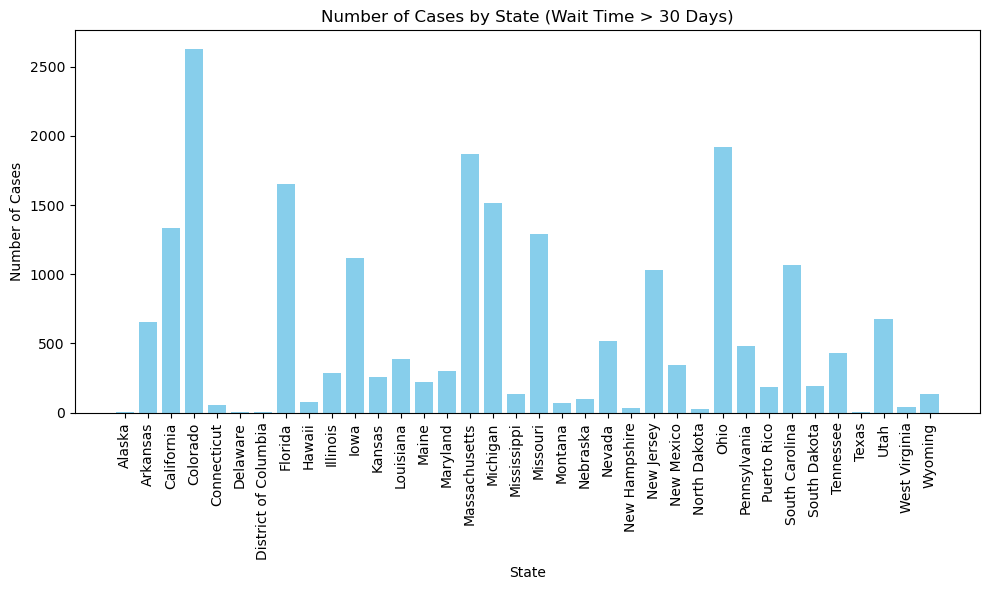

In [8]:
#plotting bar  chart for states that have longer waittime then 30 days
plt.figure(figsize=(10, 6))
plt.bar(long_wait_cases_count_per_state['STATE'], long_wait_cases_count_per_state['Total Cases'], color='skyblue')

# Adding titles and labels
plt.title('Number of Cases by State (Wait Time > 30 Days)')
plt.xlabel('State')
plt.ylabel('Number of Cases')
plt.xticks(rotation=90)  # Rotate state names for better readability
plt.tight_layout()  # Adjust layout to make room for labels

# Show the plot
plt.show()

In [9]:
wait_time_df.head()

,CASEID,PRIMPAY,HLTHINS,ETHNIC,AGE,RACE,PRIMINC,STATE,DIVISION,SERVICES,DAYWAIT,PSOURCE,NOPRIOR
3047,1647629,Self-pay,Medicaid,Not of Hispanic or Latino origin,25–29 years,White,None,Alaska,Pacific,"Rehab/residential,long term (more than 30 days)",>30,Individual,No prior treatment episodes
3706,1776699,Self-pay,Medicaid,Not of Hispanic or Latino origin,45–49 years,White,Other,Alaska,Pacific,"Rehab/residential,long term (more than 30 days)",>30,Court/criminal justice referral/DUI/DWI,Four prior treatment episodes
4891,1848495,Self-pay,Medicaid,Not of Hispanic or Latino origin,25–29 years,White,None,Alaska,Pacific,"Rehab/residential,long term (more than 30 days)",>30,Individual,No prior treatment episodes
5498,1670798,Self-pay,Medicaid,Not of Hispanic or Latino origin,30–34 years,White,None,Alaska,Pacific,"Rehab/residential,long term (more than 30 days)",>30,Individual,No prior treatment episodes
24217,1454868,"No charge (free, charity, special research, te...",None,Not of Hispanic or Latino origin,45–49 years,White,None,Arkansas,West South Central,"Ambulatory,intensive outpatient",>30,Court/criminal justice referral/DUI/DWI,No prior treatment episodes


In [10]:
#calculating total count of cases under diggernt health insurance
wait_time_df = teds_df[teds_df['DAYWAIT']=='>30']
wait_time_df
long_wait_cases_count_per_HLTHINS = wait_time_df.groupby('HLTHINS')['CASEID'].count().reset_index(name='Total Cases')

# Rename the column for clarity
long_wait_cases_count_per_HLTHINS.head(5)

,HLTHINS,Total Cases
0,Medicaid,6118
1,"Medicare, other",925
2,Missing/unknown/not collected/invalid,6728
3,None,5349
4,Private insurance,1940


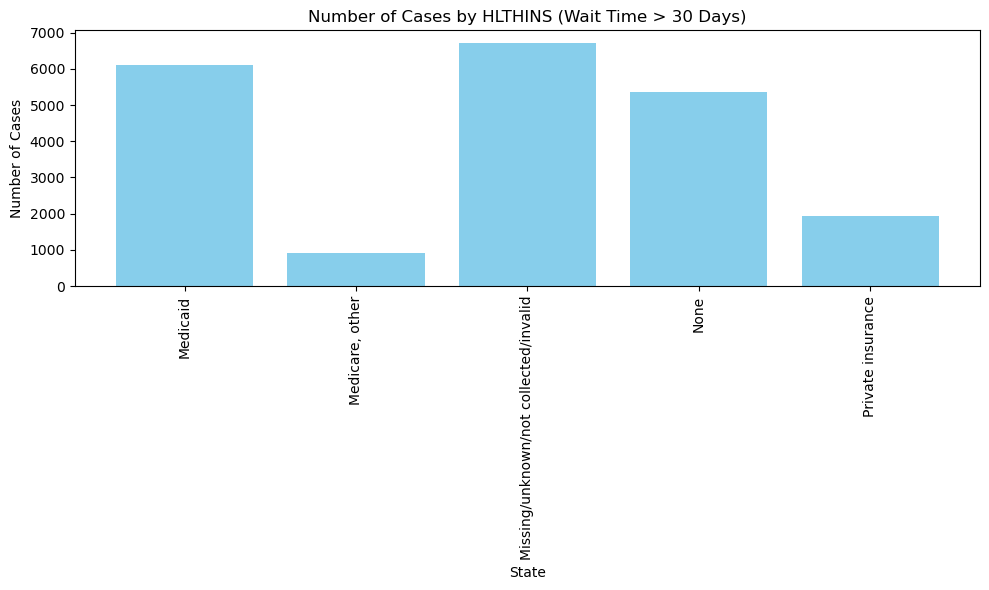

In [11]:
#plotting the bar chart of number of cases by health insurance where wait time is more then 30 days
plt.figure(figsize=(10, 6))
plt.bar(long_wait_cases_count_per_HLTHINS['HLTHINS'], long_wait_cases_count_per_HLTHINS['Total Cases'], color='skyblue')

# Adding titles and labels
plt.title('Number of Cases by HLTHINS (Wait Time > 30 Days)')
plt.xlabel('State')
plt.ylabel('Number of Cases')
plt.xticks(rotation=90)  # Rotate state names for better readability
plt.tight_layout()  # Adjust layout to make room for labels

# Show the plot
plt.show()

In [12]:
#calculating total count services used per state
state_services = teds_df.groupby('STATE')['SERVICES'].nunique().reset_index()
state_services.columns = ['STATE', 'Number_of_Unique_Services']
print("Services by State:")
state_services.head(5)



Services by State:


,STATE,Number_of_Unique_Services
0,Alabama,5
1,Alaska,5
2,Arizona,5
3,Arkansas,6
4,California,6


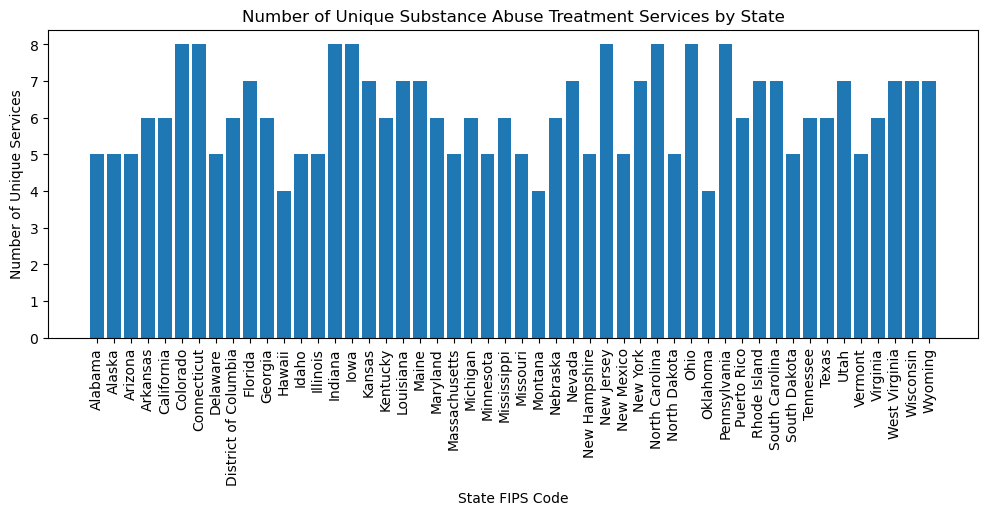

In [13]:
# Plotting services by state
plt.figure(figsize=(12, 4))
plt.bar(state_services['STATE'].astype(str), state_services['Number_of_Unique_Services'])
plt.title('Number of Unique Substance Abuse Treatment Services by State')
plt.xlabel('State FIPS Code')
plt.ylabel('Number of Unique Services')
plt.xticks(rotation=90)
plt.show()



In [14]:
#States that have limited number of services threshold value we use is less than 5
limited_options_states = state_services[state_services['Number_of_Unique_Services'] < 5]
limited_options_states 

,STATE,Number_of_Unique_Services
11,Hawaii,4
26,Montana,4
36,Oklahoma,4


In [15]:
#Group the data by DIVISION and the new service category column. Count the number of available services in each category for each region
services_mapping = {
    'Detox,24-hour,hospital inpatient': 'Inpatient Treatment',
    'Detox,24-hour,free-standing residential': 'Detoxification Services',
    'Rehab/residential,hospital (non-detox)': 'Inpatient Treatment',
    'Rehab/residential,short term (30 days or fewer)': 'Rehabilitation Services',
    'Rehab/residential,long term (more than 30 days)': 'Rehabilitation Services',
    'Ambulatory,intensive outpatient': 'Outpatient Treatment',
    'Ambulatory,non-intensive outpatient': 'Outpatient Treatment',
    'Ambulatory,detoxification': 'Outpatient Treatment'
}

# Map the services to categories
teds_df['Service Category'] = teds_df['SERVICES'].map(services_mapping)

# Group by division and Service Category, then count the number of services
service_counts = teds_df.groupby(['STATE', 'Service Category']).size().reset_index(name='Count')

# Display the results
print(service_counts)


         STATE         Service Category  Count
0      Alabama  Detoxification Services   1369
1      Alabama     Outpatient Treatment  13126
2      Alabama  Rehabilitation Services   3060
3       Alaska  Detoxification Services   1613
4       Alaska     Outpatient Treatment   3967
..         ...                      ...    ...
169  Wisconsin  Rehabilitation Services   2271
170    Wyoming  Detoxification Services    134
171    Wyoming      Inpatient Treatment     35
172    Wyoming     Outpatient Treatment   3631
173    Wyoming  Rehabilitation Services   1500

[174 rows x 3 columns]


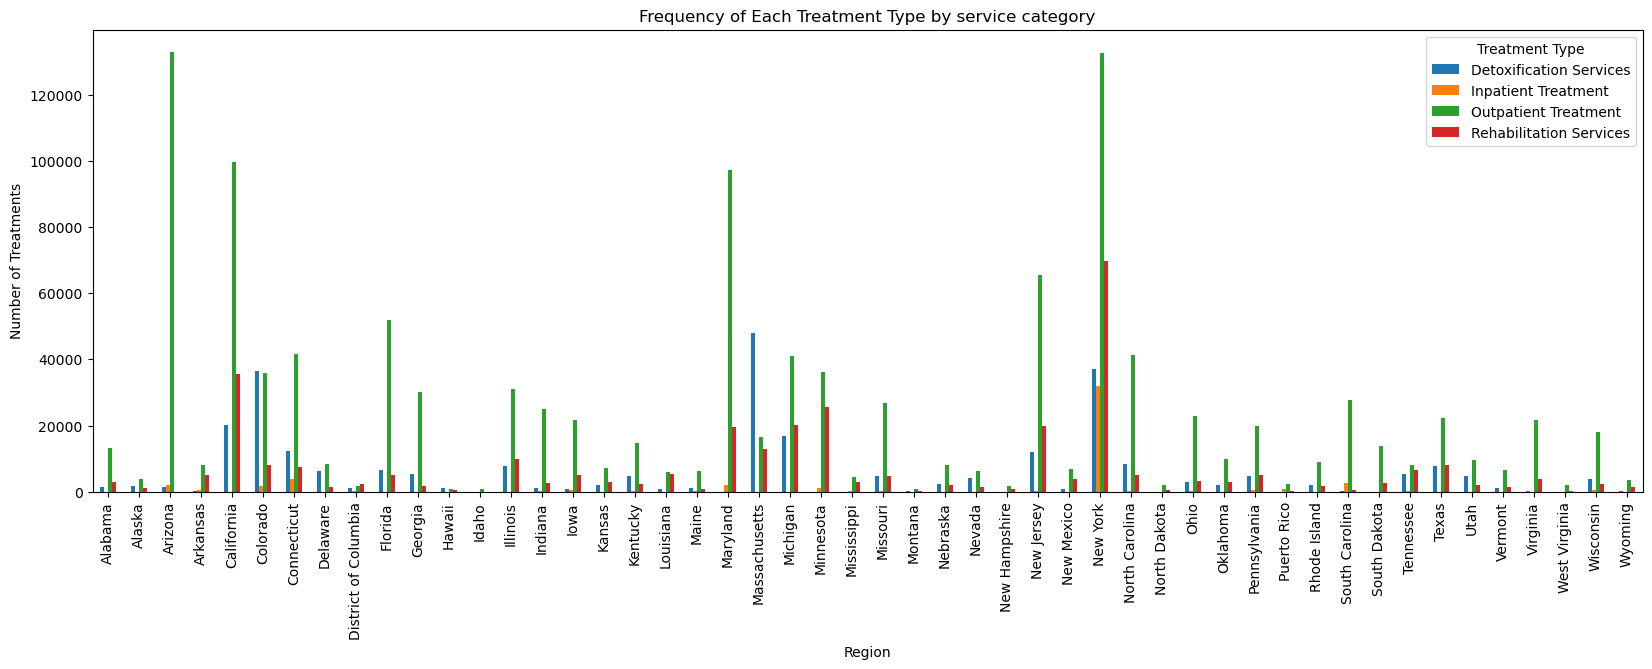

In [16]:
# plotting Frequency of Each Treatment Type by service category
treatment_counts = teds_df.groupby(['STATE', 'Service Category']).size().unstack()
treatment_counts.plot(kind='bar', figsize=(20, 6))
plt.title('Frequency of Each Treatment Type by service category')
plt.ylabel('Number of Treatments')
plt.xlabel('Region')
plt.xticks(rotation=90)
plt.legend(title='Treatment Type')
plt.show()

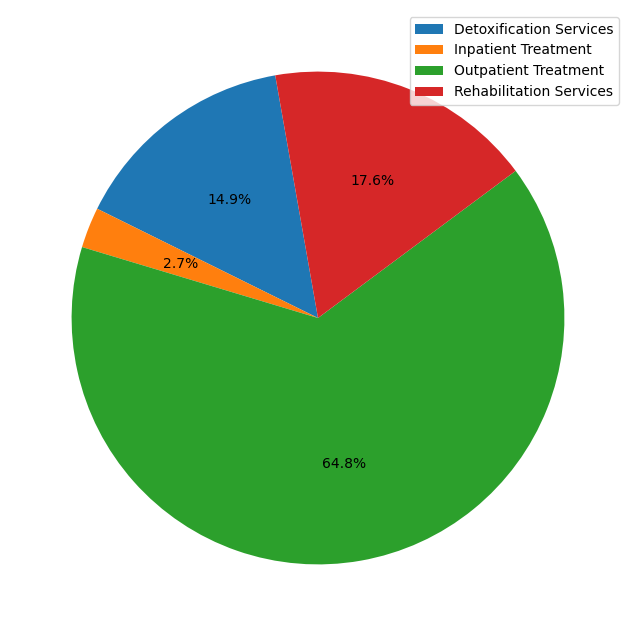

In [17]:
#analysis of categorizing the cases by service category
# Group by 'SERVICES' and count the number of non-null 'CASEID' values
grouped1 = pd.DataFrame(teds_df.groupby('Service Category')['CASEID'].count())
# Create the pie chart
plt.figure(figsize=(8, 8))  # Optional: Adjust the figure size
plt.pie(grouped1['CASEID'], autopct='%1.1f%%', startangle=100)

# Add title
# plt.title('Case Distribution by Services')
plt.legend(grouped1 .index)

# Display the pie chart
plt.show()

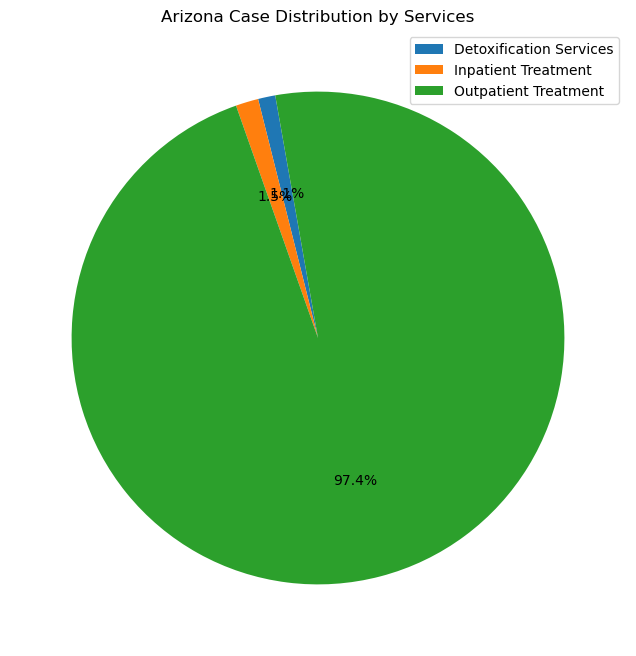

,CASEID
Service Category,
Detoxification Services,1546
Inpatient Treatment,2034
Outpatient Treatment,132951


In [18]:
#Plotting the Case Distribution by Services for Arizona
arizona_df = teds_df[teds_df['STATE'] == 'Arizona']
arizona_grouped1 = pd.DataFrame(arizona_df.groupby('Service Category')['CASEID'].count())
# Create the pie chart

plt.figure(figsize=(8, 8))  # Optional: Adjust the figure size
explode = (.05, .05, 0)
plt.pie(arizona_grouped1['CASEID'], autopct='%1.1f%%', startangle=100)
 

# Add title
plt.title('Arizona Case Distribution by Services')
plt.legend(arizona_grouped1.index)
# Display the pie chart
plt.show()
  
arizona_grouped1



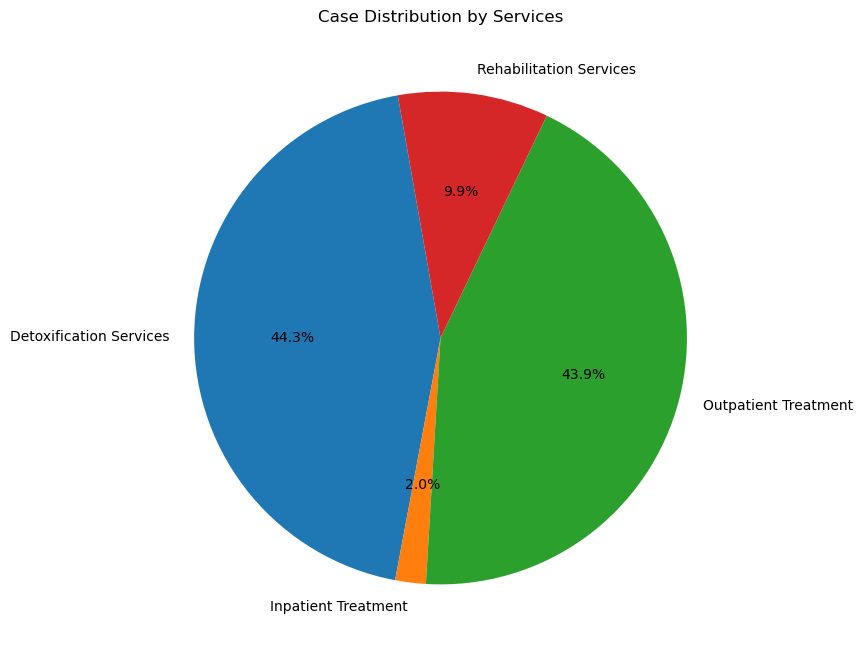

In [19]:
#Plotting the Case Distribution by Services for Colorado
colorado_df = teds_df[teds_df['STATE'] == 'Colorado']
colorado_grouped1 = pd.DataFrame(colorado_df.groupby('Service Category')['CASEID'].count())
# Create the pie chart
plt.figure(figsize=(8, 8))  # Optional: Adjust the figure size
plt.pie(colorado_grouped1['CASEID'], labels=colorado_grouped1.index, autopct='%1.1f%%', startangle=100)

# Add title
plt.title('Case Distribution by Services')

# Display the pie chart
plt.show()

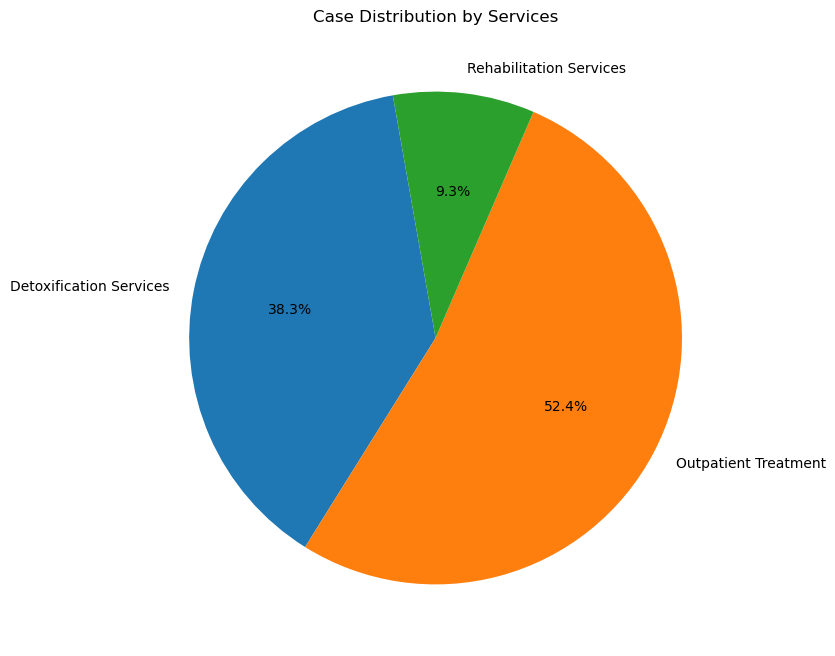

In [20]:
#Plotting the Case Distribution by Services for Delaware
delaware_df = teds_df[teds_df['STATE'] == 'Delaware']
delaware_grouped1 = pd.DataFrame(delaware_df.groupby('Service Category')['CASEID'].count())
# Create the pie chart
plt.figure(figsize=(8, 8))  # Optional: Adjust the figure size
plt.pie(delaware_grouped1['CASEID'], labels=delaware_grouped1.index, autopct='%1.1f%%', startangle=100)

# Add title
plt.title('Case Distribution by Services')

# Display the pie chart
plt.show()

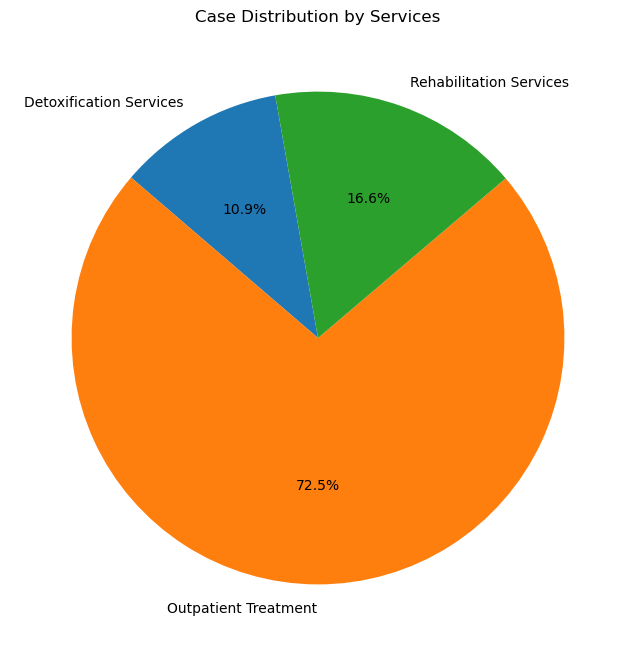

In [21]:
#Plotting the Case Distribution by Services for Vermont
vermont_df = teds_df[teds_df['STATE'] == 'Vermont']
vermont_grouped1 = pd.DataFrame(vermont_df.groupby('Service Category')['CASEID'].count())
# Create the pie chart
plt.figure(figsize=(8, 8))  # Optional: Adjust the figure size
plt.pie(vermont_grouped1['CASEID'], labels=vermont_grouped1.index, autopct='%1.1f%%', startangle=100)

# Add title
plt.title('Case Distribution by Services')

# Display the pie chart
plt.show()

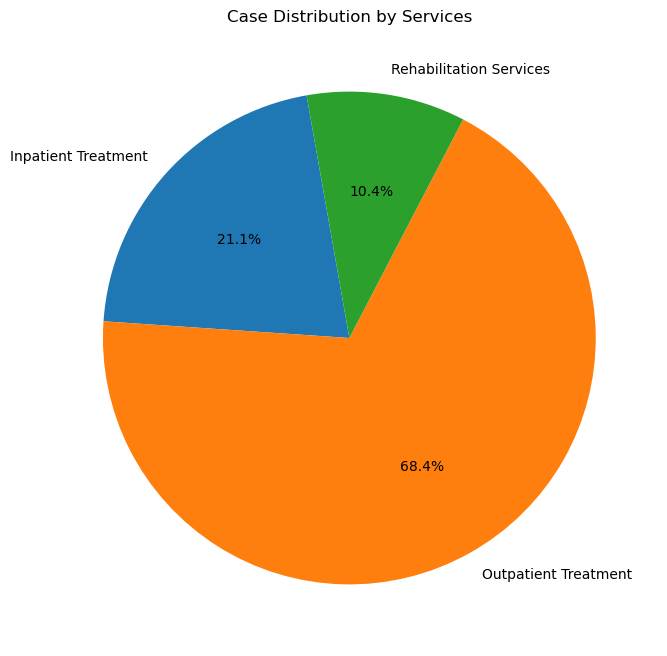

In [22]:
#Plotting the Case Distribution by Services for Puerto Rico
puertorico_df = teds_df[teds_df['STATE'] == 'Puerto Rico']
puertorico_grouped1 = pd.DataFrame(puertorico_df.groupby('Service Category')['CASEID'].count())
# Create the pie chart
plt.figure(figsize=(8, 8))  # Optional: Adjust the figure size
plt.pie(puertorico_grouped1['CASEID'], labels=puertorico_grouped1.index, autopct='%1.1f%%', startangle=100)

# Add title
plt.title('Case Distribution by Services')

# Display the pie chart
plt.show()

HLTHINS
Missing/unknown/not collected/invalid    885443
Medicaid                                 550598
None                                     294845
Medicare, other                           82003
Private insurance                         76866
Name: count, dtype: int64
Service Category                       Detoxification Services  \
HLTHINS                                                          
Medicaid                                              0.142674   
Medicare, other                                       0.144519   
Missing/unknown/not collected/invalid                 0.132741   
None                                                  0.208262   
Private insurance                                     0.161398   

Service Category                       Inpatient Treatment  \
HLTHINS                                                      
Medicaid                                          0.011667   
Medicare, other                                   0.007805   
Missing/unknown

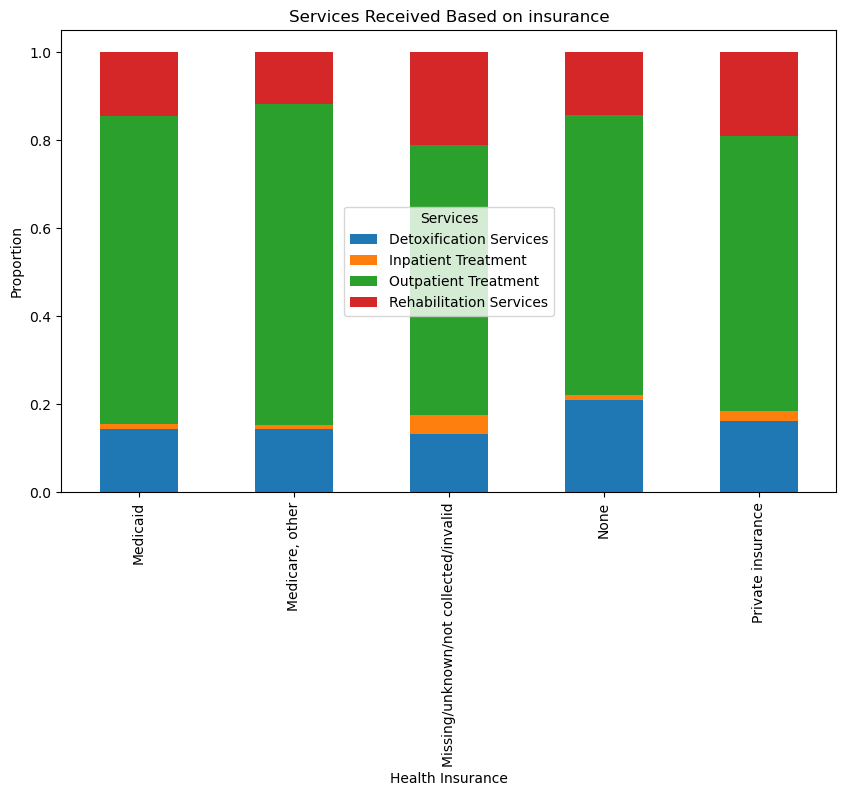

In [23]:
#This analysis will help you understand the impact  health insurance on treatment outcomes or service utilization, even in the absence of a specific treatment access column
# analysis of services recieved based on health insurance
# Check the unique values in the  HLTHINS columns
print(teds_df['HLTHINS'].value_counts())
# Analyze the number of services received based on insurance
services_by_insurance = teds_df.groupby('HLTHINS')['Service Category'].value_counts(normalize=True).unstack()
print(services_by_insurance)
# Visualize services received based on health insurance
services_by_insurance.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Services Received Based on insurance')
plt.xlabel('Health Insurance')
plt.ylabel('Proportion')
plt.legend(title='Services')
plt.show()



HLTHINS
Medicaid             550598
None                 294845
Medicare, other       82003
Private insurance     76866
Name: count, dtype: int64
Service Category                       Detoxification Services  \
HLTHINS                                                          
Medicaid                                              0.142674   
Medicare, other                                       0.144519   
Missing/unknown/not collected/invalid                 0.132741   
None                                                  0.208262   
Private insurance                                     0.161398   

Service Category                       Inpatient Treatment  \
HLTHINS                                                      
Medicaid                                          0.011667   
Medicare, other                                   0.007805   
Missing/unknown/not collected/invalid             0.042750   
None                                              0.012637   
Private insurance  

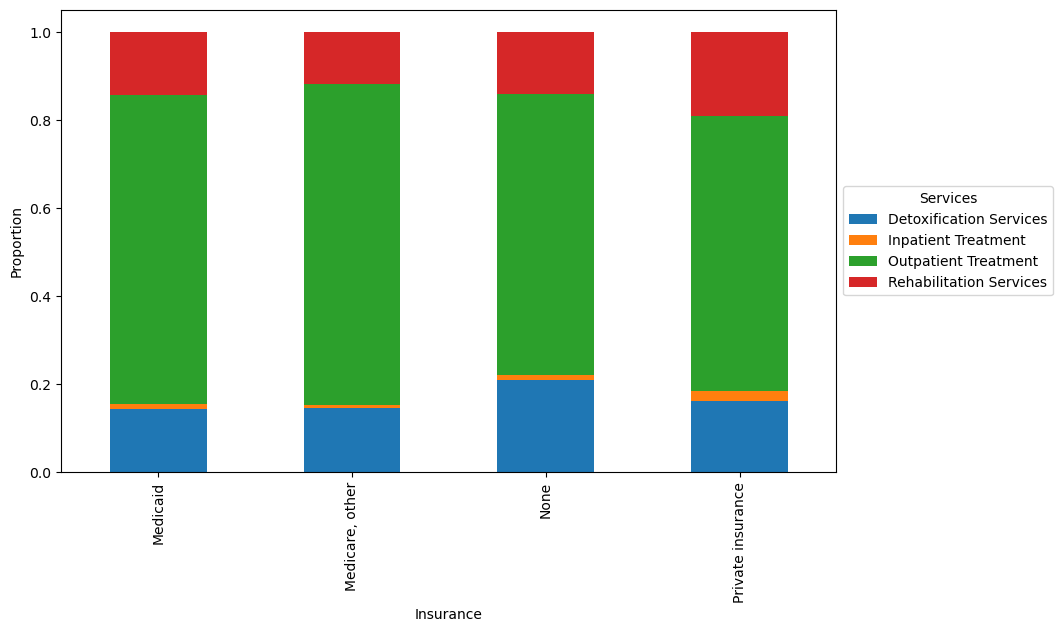

In [24]:
#filtering the data that is missing
tedsHLTHINSfiltered_df = teds_df[teds_df['HLTHINS'] != 'Missing/unknown/not collected/invalid']
# row_count=tedsHLTHINSfiltered_df.count()
# print(row_count)
print(tedsHLTHINSfiltered_df['HLTHINS'].value_counts())

# Analyze the number of services received based on insurance
services_by_insurance_filtered = tedsHLTHINSfiltered_df.groupby('HLTHINS')['Service Category'].value_counts(normalize=True).unstack()
print(services_by_insurance)
# Visualize services received based on health insurance
services_by_insurance_filtered.plot(kind='bar', stacked=True, figsize=(10, 6))
# plt.title('Services Received Based on Insurance', fontsize=16, pad=20)
plt.xlabel('Insurance')
plt.ylabel('Proportion')
plt.legend(title='Services', loc= 'center left', bbox_to_anchor=(1, 0.5))
plt.show()


            Low_Income_Status    Count
0                     Unknown  1009455
1                  Low-Income   759228
2                      Varies    50878
3  Not Necessarily Low-Income    21850


<Figure size 800x500 with 0 Axes>

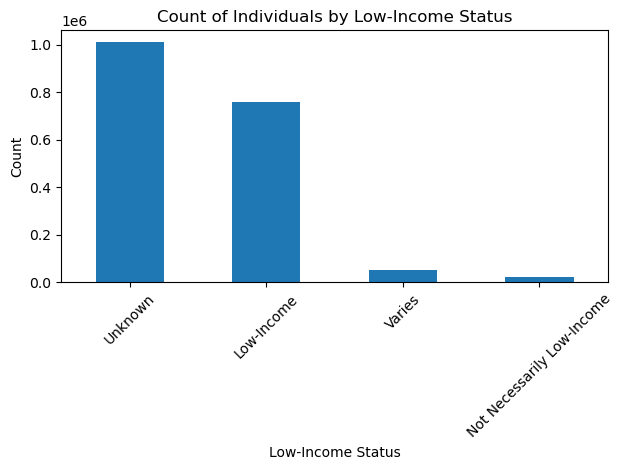

In [25]:
# Analysis based on the primary method of payment in each state
# Group by state and count the frequency of each payment source in the PRIMPAY column
payment_source_by_state = teds_df.groupby('STATE')['PRIMPAY'].value_counts().unstack(fill_value=0)
# Display the results
payment_source_by_state.head(5)

low_income_mapping = {
    'Self-pay': 'Low-Income',
    'Private insurance (Blue Cross/Blue Shield, other health insurance, workers compensation)': 'Not Low-Income',
    'Medicare': 'Not Necessarily Low-Income',
    'Medicaid': 'Low-Income',
    'Other government payments': 'Low-Income',
    'No charge (free, charity, special research, teaching)': 'Low-Income',
    'Other': 'Varies',
    'Missing/unknown/not collected/invalid': 'Unknown'
}
# Create a new column in the DataFrame to categorize each payment source based on the mapping.
# Map the PRIMPAY categories to low-income status
teds_df['Low_Income_Status'] = teds_df['PRIMPAY'].map(low_income_mapping)


# Create a summary table
summary_table = teds_df['Low_Income_Status'].value_counts()

# Convert the summary to a DataFrame
summary_table_df = summary_table.reset_index()
summary_table_df.columns = ['Low_Income_Status', 'Count']

# Display the DataFrame
print(summary_table_df)

# Plotting the summary table
plt.figure(figsize=(8, 5))
summary_table_df.plot(kind='bar', x='Low_Income_Status', y='Count', legend=False)
plt.title('Count of Individuals by Low-Income Status')
plt.xlabel('Low-Income Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


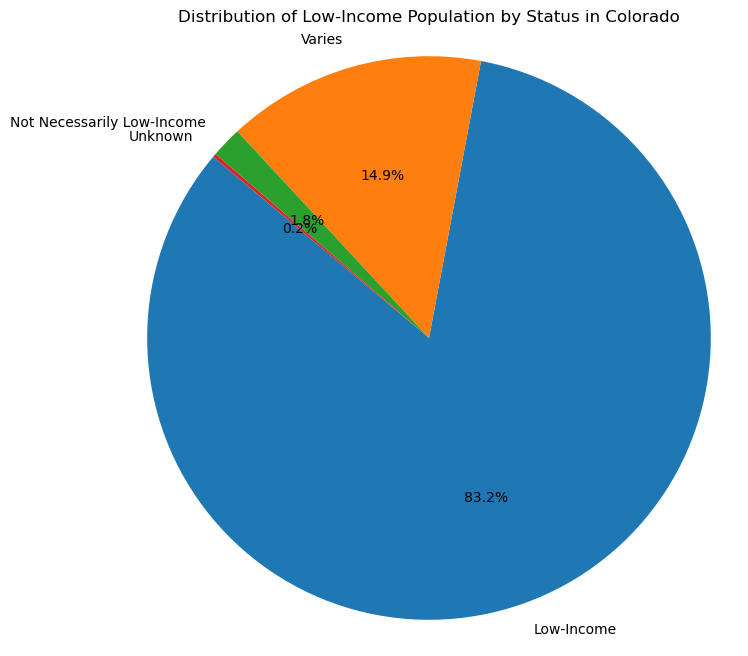

In [26]:
# Specify the individual state you want to analyze here it is colorado

state_data = teds_df[teds_df['STATE'] == 'Colorado']


# Calculate the counts for each Low-Income Status category for the specified state
low_income_counts_state = state_data['Low_Income_Status'].value_counts()


# Create a pie chart for the specified state
plt.figure(figsize=(8, 8))
plt.pie(low_income_counts_state, labels=low_income_counts_state.index, autopct='%1.1f%%', startangle=140)
plt.title(f'Distribution of Low-Income Population by Status in Colorado')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the pie chart
plt.show()

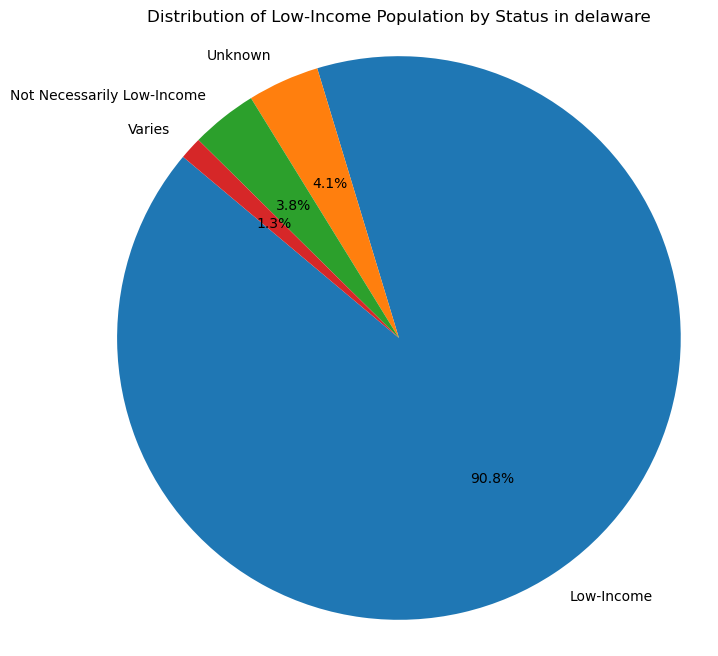

In [27]:
# Specify the individual state you want to analyze here its Delaware
state_data = teds_df[teds_df['STATE'] == 'Delaware']

# Calculate the counts for each Low-Income Status category for the specified state
low_income_counts_state = state_data['Low_Income_Status'].value_counts()

# Create a pie chart for the specified state
plt.figure(figsize=(8, 8))
plt.pie(low_income_counts_state, labels=low_income_counts_state.index, autopct='%1.1f%%', startangle=140)
plt.title(f'Distribution of Low-Income Population by Status in delaware')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the pie chart
plt.show()

In [28]:
#analysis of treatment center data based on ownership from NSATTS data files
df_grouped = nssats_pjt_df.groupby('OWNERSHP').size().reset_index(name='count')
df_grouped

,OWNERSHP,count
0,Federal government,333
1,"Local, county, or community government",694
2,Private for-profit organization,6327
3,Private non-profit organization,8043
4,State government,310
5,Tribal government,254


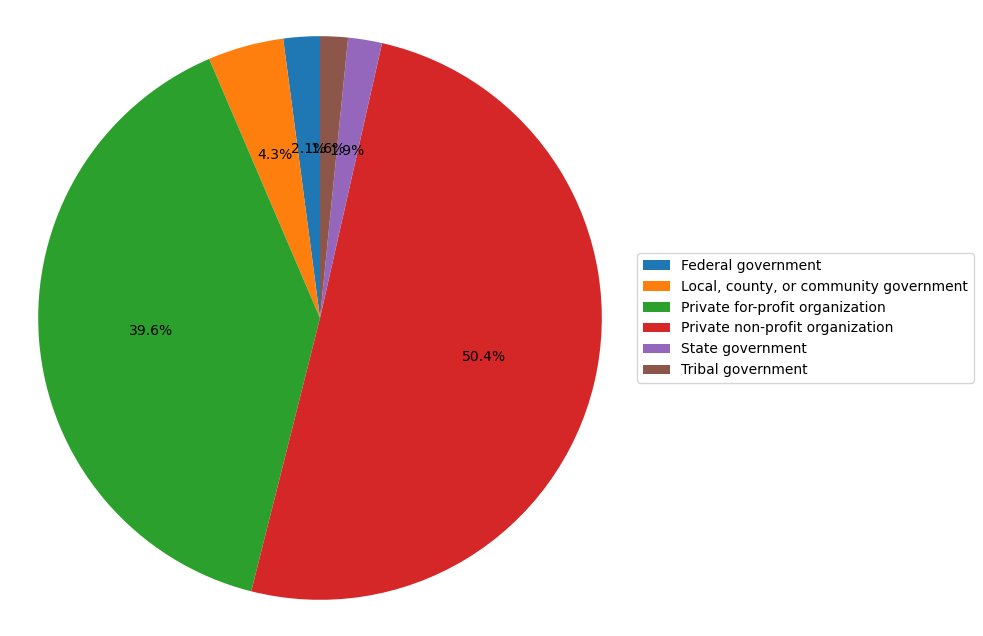

In [29]:
# plotting the pie chart based on ownership combined for all states
ownership_counts = df_grouped['count']
ownership_labels = df_grouped['OWNERSHP']

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(ownership_counts, autopct='%1.1f%%', startangle=90)
# plt.title('Treatment Centers Distribution by Ownership Type (All States Combined)', loc="center", fontsize=16, pad=20)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.legend(ownership_labels, loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

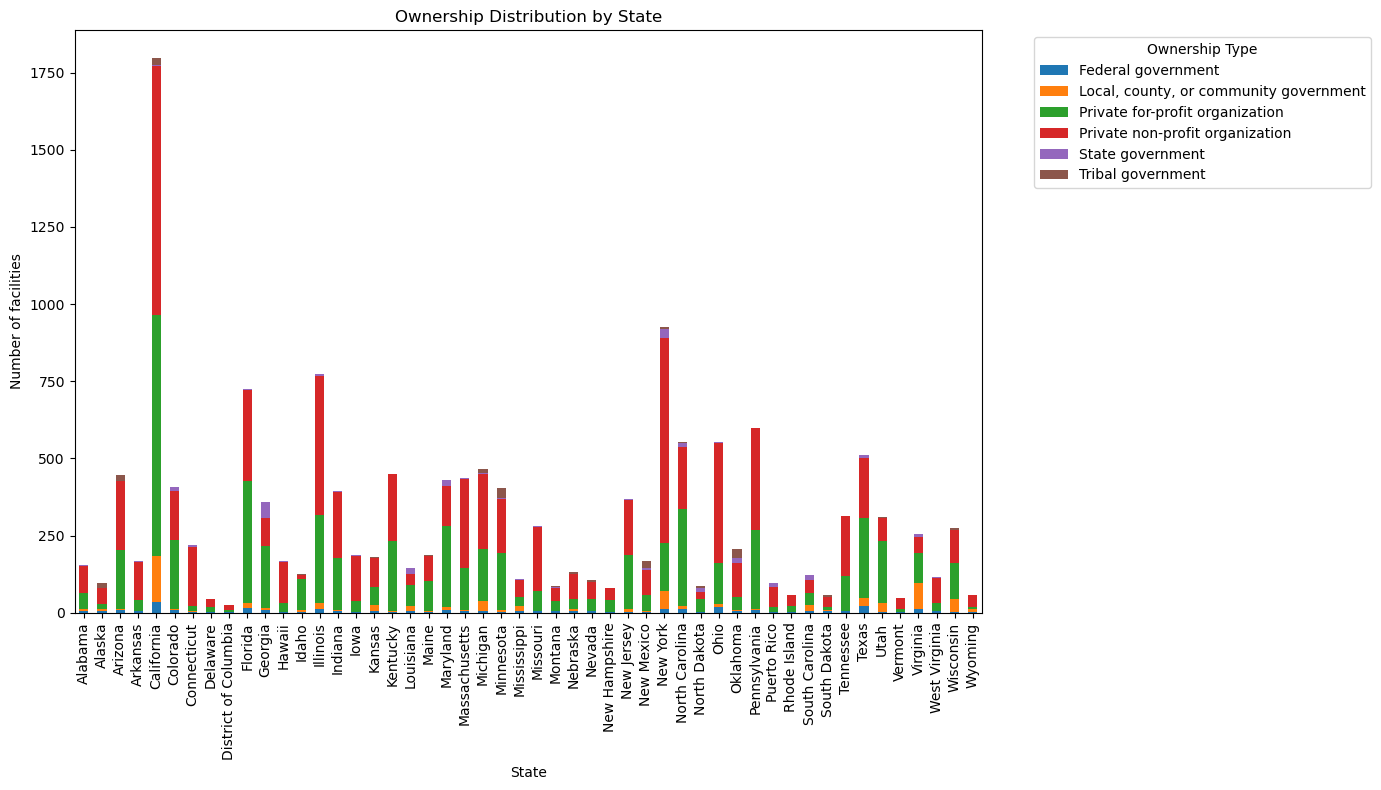

OWNERSHP,Federal government,"Local, county, or community government",Private for-profit organization,Private non-profit organization,State government,Tribal government
STATE,,,,,,
Alabama,5,7,52,86,3,0
Alaska,7,4,16,52,1,16
Arizona,9,2,191,225,1,18
Arkansas,4,0,37,123,3,0
California,35,149,780,808,4,21


In [30]:
#plotting the bar chart for treatment center for each state under different ownership
#Group by STATE and OWNERSHP, then count occurrences
ownership_by_state = nssats_pjt_df .groupby(['STATE', 'OWNERSHP']).size().unstack(fill_value=0)
ownership_by_state.head(5)

# Plotting the bar chart
ownership_by_state.plot(kind='bar', stacked=True, figsize=(14, 8))

# Customize the chart
plt.title('Ownership Distribution by State')
plt.xlabel('State')
plt.ylabel('Number of facilities')
plt.xticks(rotation=90)  # Rotate state labels for better readability
plt.legend(title='Ownership Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # Adjust layout to fit everything

# Display the plot
plt.show()
ownership_by_state.head(5)


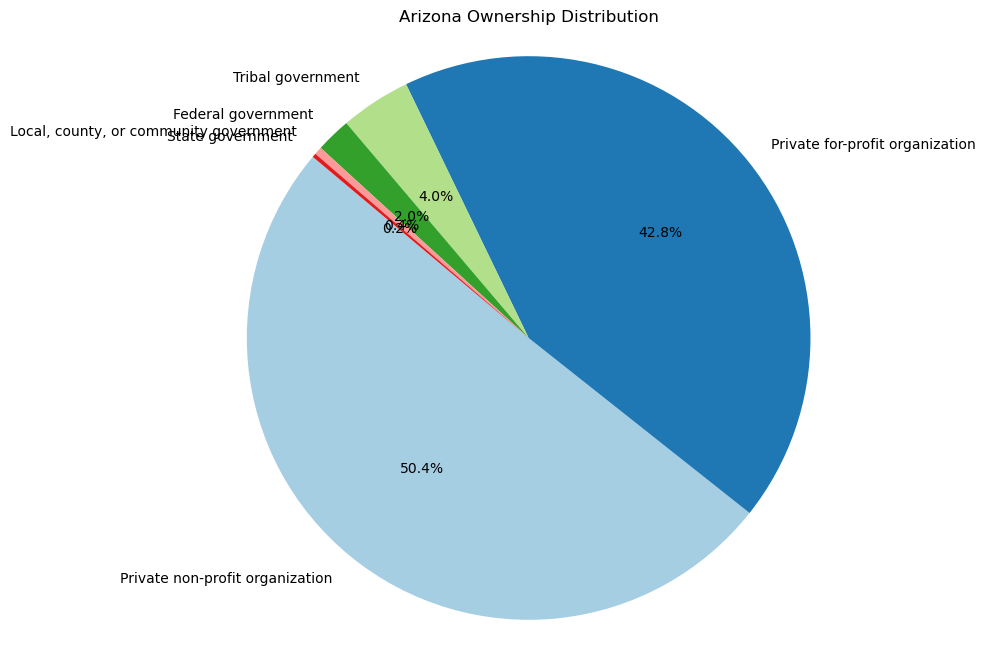

OWNERSHP
Private non-profit organization           225
Private for-profit organization           191
Tribal government                          18
Federal government                          9
Local, county, or community government      2
State government                            1
Name: count, dtype: int64

In [31]:
# plotting the pie chart based on ownership combined for Arizona
Arizona_ownership_counts = nssats_pjt_df[nssats_pjt_df['STATE'] == 'Arizona']['OWNERSHP'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))  # Set the figure size for better visibility
plt.pie(Arizona_ownership_counts, labels=Arizona_ownership_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)

# Add a title to the pie chart
plt.title('Arizona Ownership Distribution')

# Display the pie chart
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is drawn as a circle.
plt.show()
Arizona_ownership_counts

Explantion:
Dominance of Private Organizations: The data shows that the majority of treatment centers are owned by private non-profit organizations (225) and private for-profit organizations (191). This indicates that private ownership is the most common form of management for treatment centers in Arizona, suggesting that these types of organizations are likely filling a significant gap in mental health or substance abuse services.

Limited Government Ownership: The number of treatment centers owned by various government entities (Tribal government: 18, Federal government: 9, Local/county/community government: 2, State government: 1) is notably low compared to private organizations. This could imply that government involvement in the treatment center sector is minimal, which may affect accessibility and availability of services provided by government-run facilities.




Capacity and Resources: Private non-profit and for-profit organizations may have different capacities and resource allocations. Non-profits might focus more on community service and may have longer wait times if they are overwhelmed with demand. In contrast, for-profit centers may prioritize efficiency and quicker service, potentially leading to shorter wait times.

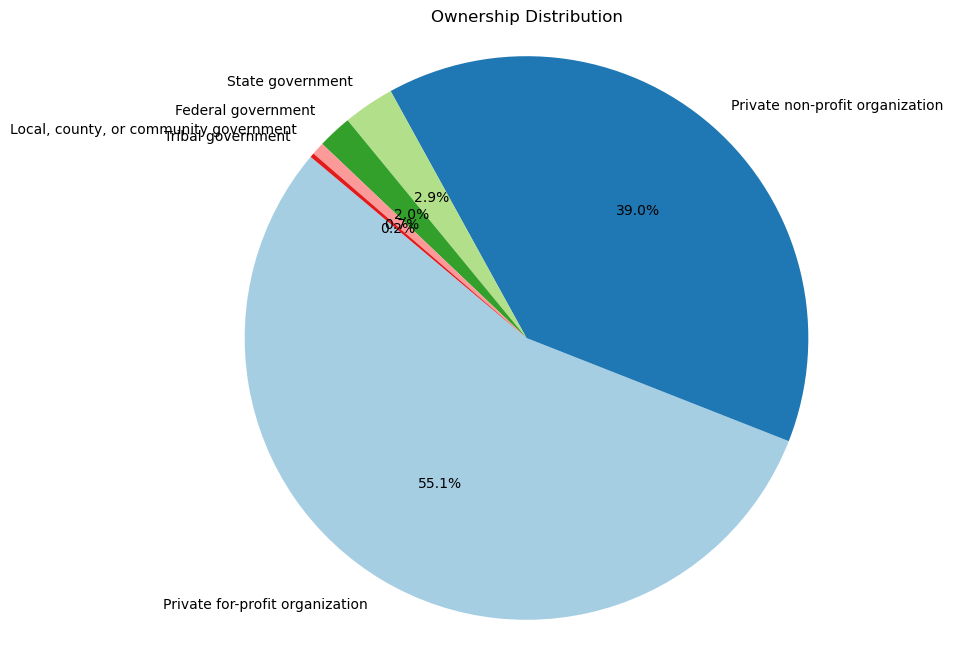

OWNERSHP
Private for-profit organization           225
Private non-profit organization           159
State government                           12
Federal government                          8
Local, county, or community government      3
Tribal government                           1
Name: count, dtype: int64

In [32]:
# plotting the pie chart based on ownership combined for colorado
colorado_ownership_counts = nssats_pjt_df[nssats_pjt_df['STATE'] == 'Colorado']['OWNERSHP'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))  # Set the figure size for better visibility
plt.pie(colorado_ownership_counts, labels=colorado_ownership_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)

# Add a title to the pie chart
plt.title('Ownership Distribution')

# Display the pie chart
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is drawn as a circle.
plt.show()
colorado_ownership_counts

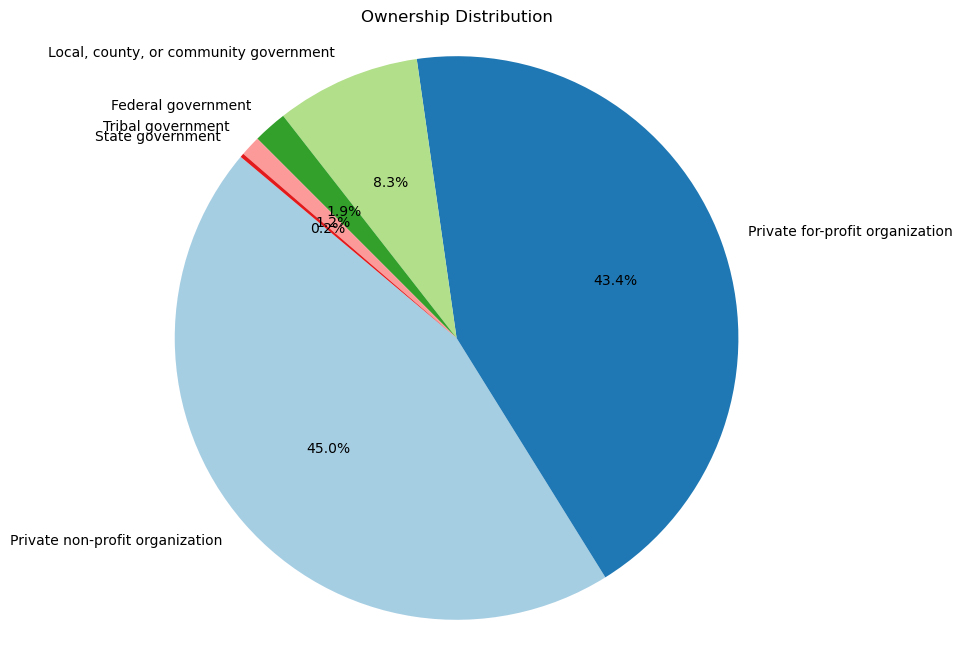

OWNERSHP
Private non-profit organization           808
Private for-profit organization           780
Local, county, or community government    149
Federal government                         35
Tribal government                          21
State government                            4
Name: count, dtype: int64

In [33]:
# plotting the pie chart based on ownership combined for california
california_ownership_counts = nssats_pjt_df[nssats_pjt_df['STATE'] == 'California']['OWNERSHP'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))  # Set the figure size for better visibility
plt.pie(california_ownership_counts, labels=california_ownership_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)

# Add a title to the pie chart
plt.title('Ownership Distribution')

# Display the pie chart
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is drawn as a circle.
plt.show()
california_ownership_counts

In [34]:
#Analysis of teds dataset number of cases Based on different age group
age_access_counts = teds_df.groupby('AGE')['SERVICES'].count().reset_index()
age_access_counts.columns = ['AGE', 'TREATMENT_ACCESS']
age_access_counts

,AGE,TREATMENT_ACCESS
0,12-14 years,11983
1,15-17 years,46797
2,18-20 years,53052
3,21–24 years,142350
4,25–29 years,309112
5,30–34 years,324003
6,35–39 years,271888
7,40–44 years,191682
8,45–49 years,162561
9,50–54 years,156232


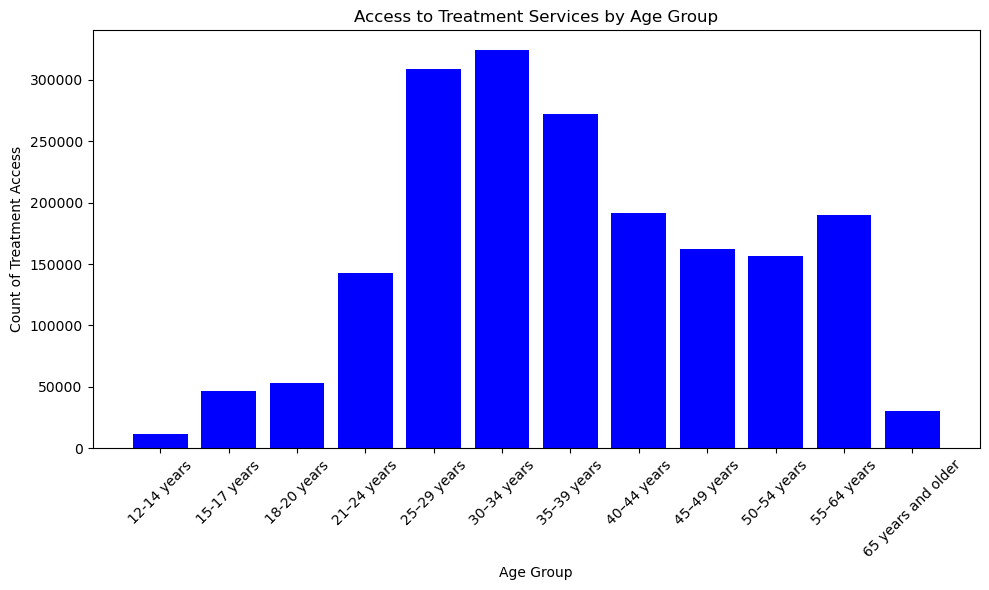

In [35]:
#plotting chart for number of cases Based on different age group
plt.figure(figsize=(10, 6))
plt.bar(age_access_counts['AGE'], age_access_counts['TREATMENT_ACCESS'], color='blue')
plt.title('Access to Treatment Services by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count of Treatment Access')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [36]:
#since our daywait time is in range we used the mid point to calculate the average
def convert_range_to_midpoint(range_str):
    # Handle 'Missing' case
    if range_str == 'Missing':
        return np.nan
    
    # Handle specific ranges by calculating midpoints
    if range_str == '0':  # No wait
        return 0
    elif range_str == '1-7':  # 1 to 7 days
        return (1 + 7) / 2
    elif range_str == '8-14':  # 8 to 14 days
        return (8 + 14) / 2
    elif range_str == '15-30':  # 15 to 30 days
        return (15 + 30) / 2
    elif range_str == '>30':  # Greater than 30 days
        return 35  # You could adjust this value if needed
    else:
        # If an unexpected value exists, print it for debugging
        print(f"Unexpected value: {range_str}")
        return np.nan  # Return np.nan for unexpected cases

# Apply the function to the 'daywait' column
teds_df['daywait_converted'] = teds_df['DAYWAIT'].apply(convert_range_to_midpoint)
# Check for NaNs before further processing
print(teds_df['daywait_converted'].isna().sum())  # Count NaNs
# Print the updated dat
teds_df

859746


,CASEID,PRIMPAY,HLTHINS,ETHNIC,AGE,RACE,PRIMINC,STATE,DIVISION,SERVICES,DAYWAIT,PSOURCE,NOPRIOR,Service Category,Low_Income_Status,daywait_converted
0,1666221,Medicaid,Medicaid,Not of Hispanic or Latino origin,18-20 years,Two or more races,Other,Alaska,Pacific,"Rehab/residential,short term (30 days or fewer)",0,Other health care provider,No prior treatment episodes,Rehabilitation Services,Low-Income,0.0
1,1570498,Self-pay,None,Cuban or other specific Hispanic,35–39 years,White,None,Alaska,Pacific,"Ambulatory,non-intensive outpatient",0,Other community referral,No prior treatment episodes,Outpatient Treatment,Low-Income,0.0
2,1547352,Medicaid,Medicaid,Not of Hispanic or Latino origin,25–29 years,American Indian (other than Alaska Native),None,Alaska,Pacific,"Rehab/residential,short term (30 days or fewer)",0,Alcohol/drug use care provider,Three prior treatment episodes,Rehabilitation Services,Low-Income,0.0
3,1510020,Medicaid,Medicaid,Not of Hispanic or Latino origin,25–29 years,Two or more races,None,Alaska,Pacific,"Ambulatory,non-intensive outpatient",0,Other health care provider,No prior treatment episodes,Outpatient Treatment,Low-Income,0.0
4,1585912,Other,None,Not of Hispanic or Latino origin,25–29 years,"Alaska Native (Aleut, Eskimo, Indian)",Other,Alaska,Pacific,"Ambulatory,non-intensive outpatient",0,Individual,One prior treatment episode,Outpatient Treatment,Varies,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1889750,1886811,Other,None,Not of Hispanic or Latino origin,25–29 years,White,Wages/salary,Wyoming,Mountain,"Ambulatory,non-intensive outpatient",1-7,Other community referral,One prior treatment episode,Outpatient Treatment,Varies,4.0
1889751,1478798,Other,None,Not of Hispanic or Latino origin,21–24 years,"Black or African American 357,433 19.2%",Wages/salary,Wyoming,Mountain,"Ambulatory,intensive outpatient",1-7,Individual,No prior treatment episodes,Outpatient Treatment,Varies,4.0
1889752,1473055,Other,None,Not of Hispanic or Latino origin,25–29 years,White,Wages/salary,Wyoming,Mountain,"Ambulatory,non-intensive outpatient",0,Other community referral,Two prior treatment episodes,Outpatient Treatment,Varies,0.0
1889753,1876192,Other,None,Not of Hispanic or Latino origin,15-17 years,White,Wages/salary,Wyoming,Mountain,"Ambulatory,non-intensive outpatient",0,Court/criminal justice referral/DUI/DWI,No prior treatment episodes,Outpatient Treatment,Varies,0.0


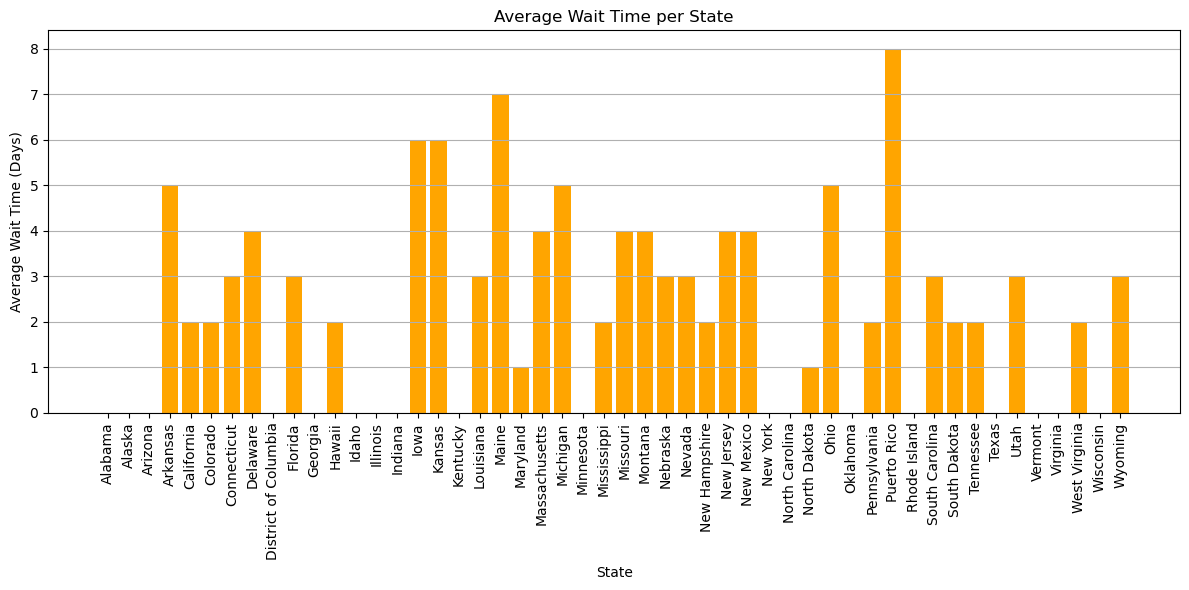

,STATE,Total Cases,Average Wait
0,Alabama,17555,0.0
1,Alaska,6661,0.0
2,Arizona,136531,0.0
3,Arkansas,13784,5.0
4,California,155345,2.0
5,Colorado,82096,2.0
6,Connecticut,65103,3.0
7,Delaware,16189,4.0
8,District of Columbia,5454,0.0
9,Florida,63277,3.0


In [37]:
# Here we are calculating average daywait based on different state with recently calculated  daytime converted acoording to midpoint 
# Step 1: Calculate the total number of cases per state (STFIPS)
total_cases_per_state = teds_df.groupby('STATE')['CASEID'].count().reset_index(name='Total Cases')

# Step 2: Calculate the average wait time per state (STFIPS)
average_wait_per_state = teds_df.groupby('STATE')['daywait_converted'].mean().reset_index(name='Average Wait')

# Step 3: Merge the two DataFrames on STFIPS to combine the total cases and average wait
state_summary = pd.merge(total_cases_per_state, average_wait_per_state, on='STATE', how='left')
state_summary['Average Wait'] = state_summary['Average Wait'].fillna(0).round(0)
# Step 4: View the result


# Create a bar chart for average wait times
plt.figure(figsize=(12, 6))
plt.bar(state_summary['STATE'], state_summary['Average Wait'], color='orange')
plt.title('Average Wait Time per State')
plt.xlabel('State')
plt.ylabel('Average Wait Time (Days)')
plt.xticks(rotation=90)  # Rotate labels for better readability
plt.grid(axis='y')  # Add gridlines for better visualization
plt.tight_layout()  # Adjust layout to make room for labels
plt.show()
state_summary

In [38]:

# Here we are calculating number of treatment centers in each state 
treatment_centers_by_state = nssats_pjt_df['STATE'].value_counts()
print(treatment_centers_by_state)

STATE
California              1797
New York                 925
Illinois                 775
Florida                  725
Pennsylvania             600
Ohio                     554
North Carolina           552
Texas                    512
Michigan                 467
Kentucky                 449
Arizona                  446
Massachusetts            438
Maryland                 431
Colorado                 408
Minnesota                403
Indiana                  393
New Jersey               370
Georgia                  358
Tennessee                313
Utah                     310
Missouri                 281
Wisconsin                276
Virginia                 254
Connecticut              220
Oklahoma                 208
Iowa                     187
Maine                    186
Kansas                   179
Arkansas                 167
Hawaii                   167
New Mexico               166
Alabama                  153
Louisiana                146
Nebraska                 131
Idaho   

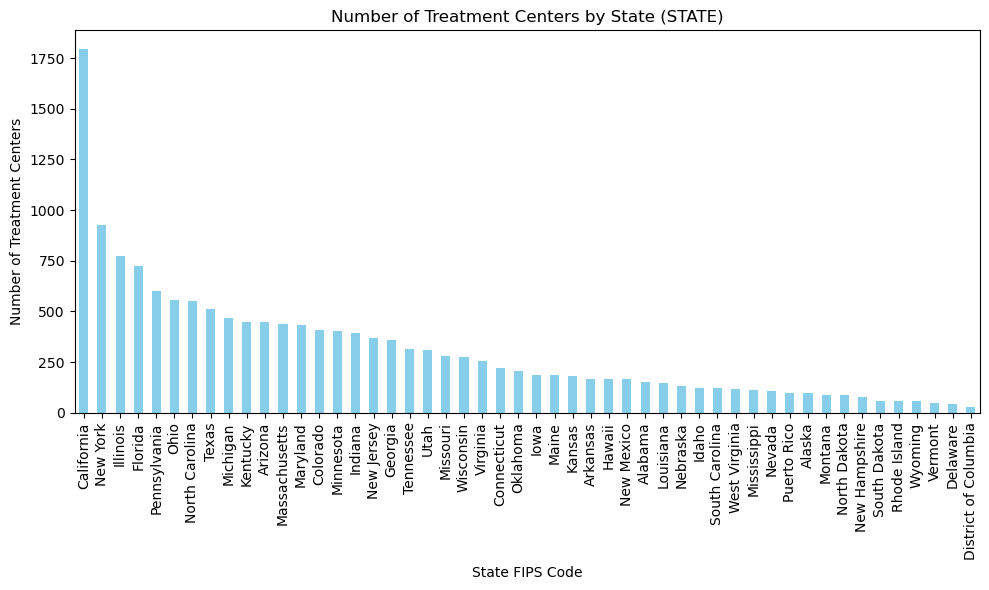

In [39]:
#Plotting the number of treatment centers by STATE
plt.figure(figsize=(10, 6))
treatment_centers_by_state.plot(kind='bar', color='skyblue')
plt.title('Number of Treatment Centers by State (STATE)')
plt.xlabel('State FIPS Code')
plt.ylabel('Number of Treatment Centers')
plt.xticks(rotation=90)  # Rotate state FIPS codes for better readability
plt.tight_layout()  # Adjust layout to make room for labels
plt.show()

In [40]:
#create a map to show the number of treatment centers in each state with the cases to number of center ratio and show areas with limited number of centers 
#In this map we have used random threshold value in further analysis we have updated it with our statistically derived threshold value
treatment_centers_by_state = nssats_pjt_df.groupby('STATE').size().reset_index()
treatment_centers_by_state.columns = ['STATE', 'Totalcenters']
combined_df = pd.merge(total_cases_per_state, treatment_centers_by_state, on='STATE')

# Calculate the ratio of treatment centers to total cases
combined_df['Ratio'] =  round(combined_df['Total Cases']/combined_df['Totalcenters'] ,0)

# Display the resulting DataFrame
print(combined_df.head(50))
# Create a base map
m = folium.Map(location=[37.8, -96], zoom_start=4)
threshold_value=100
# Function to add markers to the map
def add_markers(combined_df):
    for index, row in combined_df.iterrows():
        stfips = row['STATE']  #stfips variable is used to store value of state column for each row
        Total_centers = row['Totalcenters']
        ratio1=row['Ratio'] 
        
        # Use Geoapify to get the state boundary coordinates
        url = f"https://api.geoapify.com/v1/geocode/search?format=json&country=US&state={stfips}&apiKey={geoapify_key}"
        response = requests.get(url)
        data = response.json()
        #print(data)

# Print the response to check its structure

        if 'results' in data and data['results']:
        # Get the first result
            state_info = data['results'][0]
    
        # Extract latitude and longitude
            state_location = (state_info['lat'], state_info['lon'])
            state_name = state_info['state']
            # Determine the marker color based on the threshold
            

        # Create a marker for the state
            folium.Marker(
            location=state_location,  # Latitude, Longitude
            popup=f'{state_name}: \ntreatment_centers_by_state: {Total_centers} \nRatio:{ratio1}',
            icon=folium.Icon(color='blue' if ratio1 < threshold_value else 'red')
            ).add_to(m)
        else:
            print(f"No geographic data found for STFIPS: {stfips}")

# Add markers to the map
add_markers(combined_df)

# Print the service counts
print(combined_df)

# Display the map
display(m)

# Save the map to an HTML file
m.save('treatment_services_map.html')
treatment_centers_by_state.columns


                   STATE  Total Cases  Totalcenters  Ratio
0                Alabama        17555           153  115.0
1                 Alaska         6661            96   69.0
2                Arizona       136531           446  306.0
3               Arkansas        13784           167   83.0
4             California       155345          1797   86.0
5               Colorado        82096           408  201.0
6            Connecticut        65103           220  296.0
7               Delaware        16189            44  368.0
8   District of Columbia         5454            26  210.0
9                Florida        63277           725   87.0
10               Georgia        37424           358  105.0
11                Hawaii         2503           167   15.0
12                 Idaho          792           124    6.0
13              Illinois        48731           775   63.0
14               Indiana        28855           393   73.0
15                  Iowa        28382           187  152

Index(['STATE', 'Totalcenters'], dtype='object')

In [41]:
total_facilities = nssats_pjt_df ['CASEID'].nunique()
print(f'Total number of treatment facilities: {total_facilities}')

# Count facilities by state
facilities_by_state = nssats_pjt_df .groupby('STATE')['CASEID'].nunique()
print(f'Facilities by state:\n{facilities_by_state}')


Total number of treatment facilities: 15961
Facilities by state:
STATE
Alabama                  153
Alaska                    96
Arizona                  446
Arkansas                 167
California              1797
Colorado                 408
Connecticut              220
Delaware                  44
District of Columbia      26
Florida                  725
Georgia                  358
Hawaii                   167
Idaho                    124
Illinois                 775
Indiana                  393
Iowa                     187
Kansas                   179
Kentucky                 449
Louisiana                146
Maine                    186
Maryland                 431
Massachusetts            438
Michigan                 467
Minnesota                403
Mississippi              110
Missouri                 281
Montana                   88
Nebraska                 131
Nevada                   106
New Hampshire             80
New Jersey               370
New Mexico               166
N

In [42]:
nssats_pjt_df ['HOSPBED'] = pd.to_numeric(nssats_pjt_df ['HOSPBED'], errors='coerce').fillna(0).astype(int)
nssats_pjt_df ['RESBED'] = pd.to_numeric(nssats_pjt_df ['RESBED'], errors='coerce').fillna(0).astype(int)
# Calculate total capacity by summing hospital beds and residential beds
nssats_pjt_df ['Total_Capacity'] =  nssats_pjt_df ['HOSPBED'] +  nssats_pjt_df ['RESBED']

# View the updated DataFrame
print(nssats_pjt_df [['CASEID', 'HOSPBED', 'RESBED', 'Total_Capacity']])


          CASEID  HOSPBED  RESBED  Total_Capacity
0      201900001        0       0               0
1      201900002        0       4               4
2      201900003        0       0               0
3      201900004        0       2               2
4      201900005        0       0               0
...          ...      ...     ...             ...
15956  201915957        0       0               0
15957  201915958        0       0               0
15958  201915959        0       3               3
15959  201915960        0       0               0
15960  201915961        0       0               0

[15961 rows x 4 columns]


In [43]:
result = nssats_pjt_df .groupby('STATE').agg(
    Total_Centers=('CASEID', 'count'),  # Count of centers
    Total_Hospital_Beds=('HOSPBED', 'sum'),  # Sum of hospital beds
    Total_Residential_Beds=('RESBED', 'sum')  # Sum of residential beds
).reset_index()

# Calculate Total Capacity as a new column after aggregation
result['Total_Capacity'] = result['Total_Hospital_Beds'] + result['Total_Residential_Beds']

# View the result
result.head(50)

,STATE,Total_Centers,Total_Hospital_Beds,Total_Residential_Beds,Total_Capacity
0,Alabama,153,24,84,108
1,Alaska,96,2,44,46
2,Arizona,446,31,148,179
3,Arkansas,167,7,51,58
4,California,1797,86,1322,1408
5,Colorado,408,23,103,126
6,Connecticut,220,34,115,149
7,Delaware,44,6,8,14
8,District of Columbia,26,0,14,14
9,Florida,725,142,499,641


In [44]:
print(combined_df.columns.tolist())
final_df = pd.merge(combined_df, result[['STATE', 'Total_Capacity']], on='STATE', how='left')
final_df

['STATE', 'Total Cases', 'Totalcenters', 'Ratio']


,STATE,Total Cases,Totalcenters,Ratio,Total_Capacity
0,Alabama,17555,153,115.0,108
1,Alaska,6661,96,69.0,46
2,Arizona,136531,446,306.0,179
3,Arkansas,13784,167,83.0,58
4,California,155345,1797,86.0,1408
5,Colorado,82096,408,201.0,126
6,Connecticut,65103,220,296.0,149
7,Delaware,16189,44,368.0,14
8,District of Columbia,5454,26,210.0,14
9,Florida,63277,725,87.0,641


In [45]:
#Calculate the ratio of Total Cases to Totalcenters
final_df['Capacity_Ratio'] = final_df['Total Cases'] / final_df['Total_Capacity']

# Define a threshold for treatment center desert (for example, mean + 1 standard deviation)
threshold = final_df['Capacity_Ratio'].mean() + final_df['Capacity_Ratio'].std()

# Identify treatment center deserts
treatment_deserts2 = final_df[final_df['Capacity_Ratio'] > threshold]

# View the treatment center deserts
print(treatment_deserts2[['STATE', 'Total Cases', 'Totalcenters', 'Capacity_Ratio']])
threshold



         STATE  Total Cases  Totalcenters  Capacity_Ratio
2      Arizona       136531           446      762.743017
5     Colorado        82096           408      651.555556
7     Delaware        16189            44     1156.357143
20    Maryland       118762           431      576.514563
30  New Jersey        97888           370      540.817680
45     Vermont         9257            48      925.700000


480.1996163492678

In [46]:
#create a map to show the number of treatment centers in each state with the cases to number of center ratio and show areas with limited number of centers 

# Calculate the ratio of treatment centers to total cases

# Display the resulting DataFrame
print(final_df.head(50))
# Create a base map
m = folium.Map(location=[37.8, -96], zoom_start=4)
# Function to add markers to the map
def add_markers(final_df):
    for index, row in final_df.iterrows():
        stfips = row['STATE']  #stfips variable is used to store value of state column for each row
        Total_centers = row['Totalcenters']
        ratio1=row['Capacity_Ratio'] 
        
        # Use Geoapify to get the state boundary coordinates
        url = f"https://api.geoapify.com/v1/geocode/search?format=json&country=US&state={stfips}&apiKey={geoapify_key}"
        response = requests.get(url)
        data = response.json()
        #print(data)

# Print the response to check its structure

        if 'results' in data and data['results']:
        # Get the first result
            state_info = data['results'][0]
    
        # Extract latitude and longitude
            state_location = (state_info['lat'], state_info['lon'])
            state_name = state_info['state']
            # Determine the marker color based on the threshold
            

        # Create a marker for the state
            folium.Marker(
            location=state_location,  # Latitude, Longitude
            popup=f'{state_name}: \ntreatment_centers_by_state: {Total_centers} \nRatio:{ratio1}',
            icon=folium.Icon(color='blue' if ratio1 < threshold else 'red')
            ).add_to(m)
        else:
            print(f"No geographic data found for STFIPS: {stfips}")

# Add markers to the map
add_markers(final_df)



# Display the map
display(m)

# Save the map to an HTML file
m.save('treatment_services_map.html')
treatment_centers_by_state.columns


                   STATE  Total Cases  Totalcenters  Ratio  Total_Capacity  \
0                Alabama        17555           153  115.0             108   
1                 Alaska         6661            96   69.0              46   
2                Arizona       136531           446  306.0             179   
3               Arkansas        13784           167   83.0              58   
4             California       155345          1797   86.0            1408   
5               Colorado        82096           408  201.0             126   
6            Connecticut        65103           220  296.0             149   
7               Delaware        16189            44  368.0              14   
8   District of Columbia         5454            26  210.0              14   
9                Florida        63277           725   87.0             641   
10               Georgia        37424           358  105.0             232   
11                Hawaii         2503           167   15.0      

Index(['STATE', 'Totalcenters'], dtype='object')

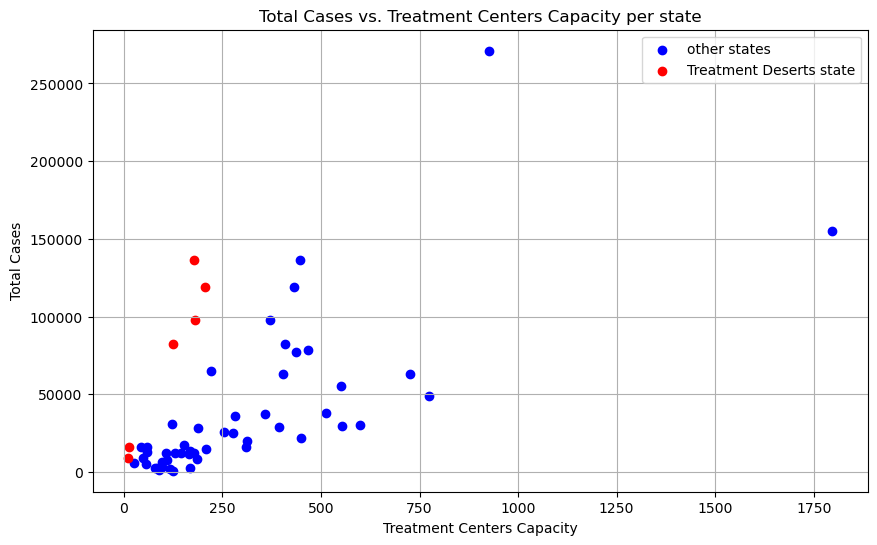

     STATE  Capacity_Ratio
   Arizona      762.743017
  Colorado      651.555556
  Delaware     1156.357143
  Maryland      576.514563
New Jersey      540.817680
   Vermont      925.700000


In [47]:
#plotting the same data using scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(final_df['Totalcenters'], final_df['Total Cases'], color='blue', label="other states")
plt.title('Total Cases vs. Treatment Centers Capacity per state')
plt.xlabel('Treatment Centers Capacity')
plt.ylabel('Total Cases')

# Highlight treatment center deserts
plt.scatter(treatment_deserts2['Total_Capacity'], treatment_deserts2['Total Cases'], color='red', label='Treatment Deserts state')

plt.legend()
plt.grid()
plt.show()
print(treatment_deserts2[["STATE", "Capacity_Ratio"]].to_string(index=False))


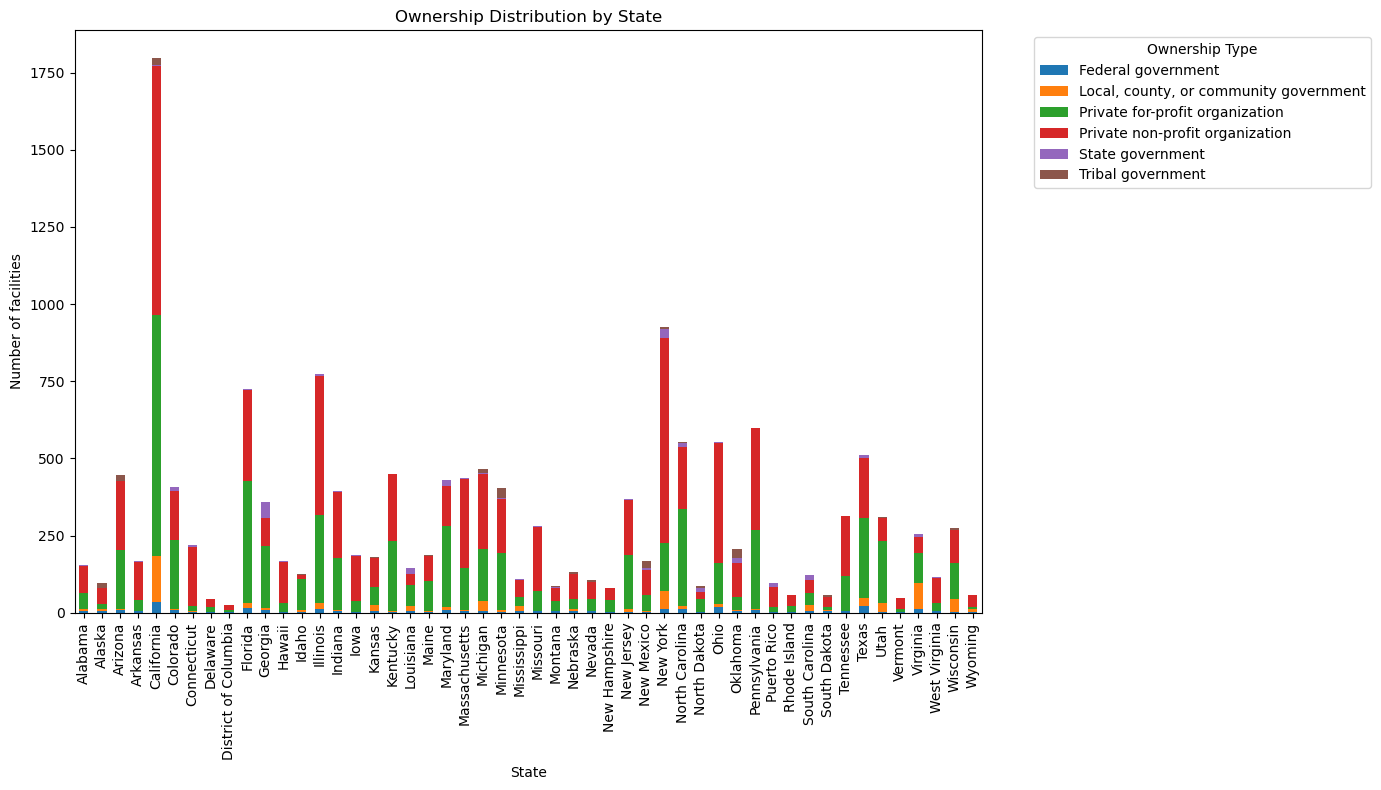

In [48]:
# Analysis of ownership distribution based on state
# Group by STATE and OWNERSHP, then count occurrences
ownership_by_state = nssats_pjt_df.groupby(['STATE', 'OWNERSHP']).size().unstack(fill_value=0)
ownership_by_state.head(5)
# Plotting the bar chart

ownership_by_state.plot(kind='bar', stacked=True, figsize=(14, 8))

# Customize the chart
plt.title('Ownership Distribution by State')
plt.xlabel('State')
plt.ylabel('Number of facilities')
plt.xticks(rotation=90)  # Rotate state labels for better readability
plt.legend(title='Ownership Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # Adjust layout to fit everything

# Display the plot
plt.show()

F-statistic: 0.4675476751194555, P-value: 0.519637175760407


<Figure size 1500x1200 with 0 Axes>

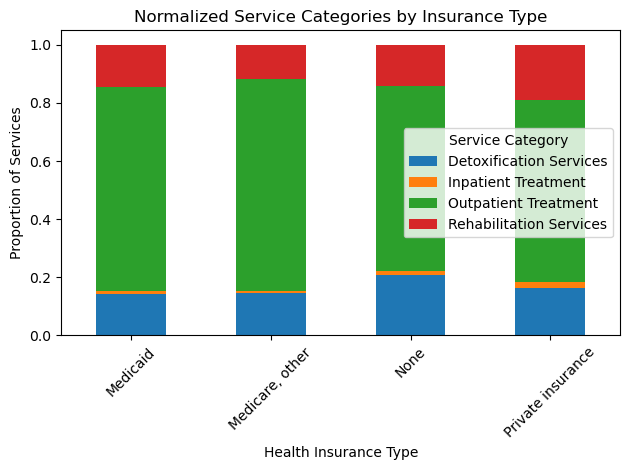

In [49]:
#filtering missing data and perfromed annova test
tedsHLTHINSfiltered_df = teds_df[teds_df['HLTHINS'] != 'Missing/unknown/not collected/invalid']

# Analyze the number of services received based on insurance
services_by_insurance = tedsHLTHINSfiltered_df.groupby('HLTHINS')['Service Category'].value_counts(normalize=True).unstack()
insurance_mapping = {
                 'Private insurance, Blue Cross/Blue Shield, HMO':'Private',
                 'Medicaid':'Medicaid',
                 'Medicare, other (e.g. TRICARE, CHAMPUS)':'Medicare',
                 'None':'None',
                 'Missing/unknown/not collected/invalid':'Missing'
}
teds_df['Insurance'] = tedsHLTHINSfiltered_df['HLTHINS'].map(insurance_mapping)
# Group by Insurance and Service Category and count occurrences
service_counts = teds_df.groupby(['Insurance', 'Service Category']).size().unstack(fill_value=0)
# Prepare the data for ANOVA
data_for_anova = [service_counts.loc[insurance].values for insurance in service_counts.index]
# Check if groups have variability
if all(len(group) > 1 for group in data_for_anova):
    # Perform ANOVA test
    f_statistic, p_value = stats.f_oneway(*data_for_anova)
    print(f"F-statistic: {f_statistic}, P-value: {p_value}")
else:
    print("Not enough variability in one or more groups to perform ANOVA.")
    # Plotting the data
plt.figure(figsize=(15, 12))
services_by_insurance.plot(kind='bar', stacked=True)
# Adding titles and labels
plt.title('Normalized Service Categories by Insurance Type')
plt.xlabel('Health Insurance Type')
plt.ylabel('Proportion of Services')
plt.legend(title='Service Category')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to make room for labels
# Show the plot
plt.show() 